In [ ]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Step 2: Load the dataset
ipl = pd.read_csv('/ipl_dataset.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
# Step 3.1: Drop unnecessary features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
               'mid', 'striker', 'non-striker'], axis=1)


In [ ]:
# Step 3.2: Split into X and y
X = df.drop(['total'], axis=1)
y = df['total']


In [ ]:
# Step 3.3: Label Encoding
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [ ]:
# Step 3.4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 3.5: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 4: Define the Neural Network
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)


In [ ]:
# Step 5: Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64,
                    validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 55.9067 - val_loss: 22.1695
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 22.4351 - val_loss: 22.1367
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 22.3038 - val_loss: 22.0371
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 22.2379 - val_loss: 21.9037
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.3194 - val_loss: 21.8898
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 22.0311 - val_loss: 21.8503
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 22.1536 - val_loss: 21.8329
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.1988 - val_loss: 21.9136
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0811 - val_loss: 22.1304
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 22.1131 - val_loss: 21.7766
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0763 - val_loss: 21.7903
Epoch 12/50
832/832 ━━━━━━━━━━

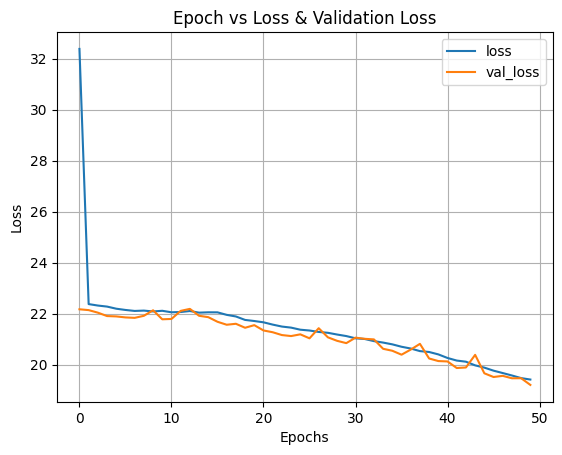

In [ ]:
# Plotting loss
model_losses = pd.DataFrame(history.history)
model_losses.plot(title="Epoch vs Loss & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [ ]:
# Step 6: Model Evaluation
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Absolute Error: 19.692724227905273


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

venue_widget = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Venue:')
batting_team_widget = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Batting:')
bowling_team_widget = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Bowling:')
striker_widget = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Striker:')
bowler_widget = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Bowler:')
predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()
        # Transform categorical input
        venue_val = venue_encoder.transform([venue_widget.value])[0]
        bat_val = batting_team_encoder.transform([batting_team_widget.value])[0]
        bowl_val = bowling_team_encoder.transform([bowling_team_widget.value])[0]
        striker_val = striker_encoder.transform([striker_widget.value])[0]
        bowler_val = bowler_encoder.transform([bowler_widget.value])[0]

        # Create and reshape input
        input_arr = np.array([venue_val, bat_val, bowl_val, striker_val, bowler_val]).reshape(1, -1)
        input_scaled = scaler.transform(input_arr)

        # Predict
        predicted_score = model.predict(input_scaled)
        print(f"🏏 Predicted Score: {int(predicted_score[0][0])}")

predict_button.on_click(predict_score)

display(venue_widget, batting_team_widget, bowling_team_widget, striker_widget, bowler_widget, predict_button, output)


Dropdown(description='Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, Mohali',…

Dropdown(description='Batting:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', …

Dropdown(description='Bowling:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils'…

Dropdown(description='Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Mohammad Ha…

Dropdown(description='Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL White'…

Button(description='Predict Score', style=ButtonStyle())

Output()